# Introdução

Durante o seu projeto, você precisará criar visualizações que facilitem o usuário chegar a conclusões relevantes para o negócio. Para decidir quais visualizações utilizar e porquê, é importante que você possa entender melhor seus dados. *Análise de dados* é o processo de inspecionar, limpar, transformar, e modelar dados com o objetivo de descobrir informações úteis, chegar a conclusões e dar suporte ao processo decisório.

Análise de dados pode ser realizada de diversas formas, por exemplo através de queries em SQL a dados que estejam num banco de dados. Na stack de um cientista de dados, Python é a [linguagem mais utilizada](https://businessoverbroadway.com/2019/01/13/programming-languages-most-used-and-recommended-by-data-scientists/) (83%) e também a mais recomendada (75%).

Nas próximas duas aulas, você irá aprender mais sobre Python para análise e visualização de dados. Para muitos, será uma oportunidade de aprender mais sobre uma nova linguagem e também para aumentar o seu ferramental.

### Análise de dados com `pandas`

Nessa aula, iremos aprender mais sobre análise de dados em Python através de uso do pacote [pandas](http://pandas.pydata.org/pandas-docs/stable/). Esse é um dos pacotes mais populares para Ciência de Dados, seu [repositório no github](https://github.com/pandas-dev/pandas) contém mais de 1500 contribuidores, com quase 20 mil commits. Para essa aula, iremos cobrir os seguintes tópi:

#### Tópicos

1 - [Importar e sumarizar dados](#section1)<br>

2 - [Manipulação de colunas, Indexação, e Slicing](#section2)<br>

3 - [Manipulação de colunas II](#section3)<br>

4 - [Mergeando dataframes](#section4)<br>

5 - [Groupby](#section5)<br>


## 1. Importar e sumarizar dados <a id="section1"/>

Os dados usados para essa parte estão disponíveis na pasta `data/`. Para este exemplo, vamos trabalhar com dados de desemprego da União Européia, disponíveis [aqui](https://code.google.com/p/dspl/downloads/list). Vamos trabalhar com diversos arquivos .csv durante esta aula.

Vamos começar por importar o pacote para nosso ambiente.

In [1]:
import pandas as pd

A função `read_csv()` no `pandas` nos permite importar dados. Por default, a função assume que os dados são delimitados por vírgula. Porém, voce pode especificar o delimitador presente nos seus dados (ex., tab, semicolon, pipe, etc.). Ha diversos outros parametros que voce pode especificar, veja a [documentacao](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html). `read_csv()` retorna um `DataFrame`.

In [16]:
unemployment = pd.read_csv('data/country_total.csv')
type(unemployment)

pandas.core.frame.DataFrame

Ótimo! Você criou um `pandas` `DataFrame`. Note que chamamos `read_csv()` usando a abreviação `pd` de acordo com o import acima. O parâmetro de entrada é do tipo string, que são criadas em python através de aspas simples.

Nós podemos dar uma olhada nos dados usando o método `.head()`. Como padrão, esse comando irá retornar as primeiras 5 linhas de dados (você pode passar um inteiro como parâmetro para especificar o numero de linhas). Para ver as últimas $n$ linhas, use `.tail(n)`.

In [3]:
n=10 #numero de linhas para visualizar
unemployment.head(n)

,country,seasonality,month,unemployment,unemployment_rate
0,at,nsa,1993.01,171000,4.5
1,at,nsa,1993.02,175000,4.6
2,at,nsa,1993.03,166000,4.4
3,at,nsa,1993.04,157000,4.1
4,at,nsa,1993.05,147000,3.9
5,at,nsa,1993.06,134000,3.5
6,at,nsa,1993.07,128000,3.4
7,at,nsa,1993.08,130000,3.4
8,at,nsa,1993.09,132000,3.5
9,at,nsa,1993.10,141000,3.7


Note que um `DataFrame` pode conter colunas contendo dados de diferentes tipos. Essa é uma distinção importante de outros tipos de dados.
O código abaixo mostra os tipos de dados de cada coluna.

In [4]:
unemployment.dtypes

country               object
seasonality           object
month                float64
unemployment           int64
unemployment_rate    float64
dtype: object

Para descobrir o número de linhas dos seus dados você pode usar a função `len()`. Para descobrir o tamanho de todas as dimensões, você pode usar o atributo`shape`.

In [5]:
unemployment.shape

(20796, 5)

Temos 20,796 linhas e 5 colunas.

Um método útil que gera várias estatísticas descritivas é `.describe()`.

In [6]:
unemployment.describe()

,month,unemployment,unemployment_rate
count,20796.000000,2.079600e+04,19851.000000
mean,1999.401290,7.900818e+05,8.179764
std,7.483751,1.015280e+06,3.922533
min,1983.010000,2.000000e+03,1.100000
25%,1994.090000,1.400000e+05,5.200000
50%,2001.010000,3.100000e+05,7.600000
75%,2006.010000,1.262250e+06,10.000000
max,2010.120000,4.773000e+06,20.900000


Você pode ter notado que a contagem "count" é menor para a coluna `unemployment_rate`. Isso acontece porquê a contagem ignora valores faltantes. 

Os valores retornados depende dos tipos de dados de cada coluna. Se o `DataFrame` contém colunas númericas, por default ele irá retornar o sumário para os dados númericos, ignorando os demais. 

### Desafio 1: Importar dados de uma URL

A função `read_csv` também possibilita importar dados a partir de uma URL. Assim como no caso acima, a função toma como parâmetro uma string, nesse caso a URL indicando onde os dados .csv estão localizados na web.

Use a função `read_csv` para salvar  os dados disponíveis [aqui](https://raw.githubusercontent.com/dlab-berkeley/introduction-to-pandas/master/data/countries.csv) (salvo como a variável string `countries_url` abaixo) para a variável `countries`.

In [8]:
countries_url = 'https://raw.githubusercontent.com/dlab-berkeley/introduction-to-pandas/master/data/countries.csv'
countries = # seu código aqui
countries.head()

,country,google_country_code,country_group,name_en,name_fr,name_de,latitude,longitude
0,at,AT,eu,Austria,Autriche,Österreich,47.696554,13.345980
1,be,BE,eu,Belgium,Belgique,Belgien,50.501045,4.476674
2,bg,BG,eu,Bulgaria,Bulgarie,Bulgarien,42.725674,25.482322
3,hr,HR,non-eu,Croatia,Croatie,Kroatien,44.746643,15.340844
4,cy,CY,eu,Cyprus,Chypre,Zypern,35.129141,33.428682


### Desafio 2: Análises básicas

Utilizando os métodos aprendidos responda sobre o dataframe `countries`
- A que cada linha corresponde no dataframe?
- Quais os tipos de dados de cada coluna?
- Quantos países existem no dataframe?
- Existem dados faltantes nas colunas longitude ou latitude?

Retorne os 10 últimos países usando o método `tail` e responda:
- Como se escreve Suécia em Alemão?
- Quais os dois primeiros dígitos da latitude de Noruega?
- Qual a diferença de latitude entre Slovenia e Espanha?

In [ ]:
# use essa célula para responder às perguntas acima.

## 2. Manipulação de colunas, Indexação, e Slicing <a id="section2"/>
De volta ao dataframe `unemployment`. Você pode ter notado que a coluna `month` também inclui o ano. 

In [14]:
unemployment.head()

,country,seasonality,unemployment,unemployment_rate,year_month
0,at,nsa,171000,4.5,1993.01
1,at,nsa,175000,4.6,1993.02
2,at,nsa,166000,4.4,1993.03
3,at,nsa,157000,4.1,1993.04
4,at,nsa,147000,3.9,1993.05


Você pode acessar, criar e sobrescrever colunas usando `[<nome da coluna>]`. O código abaixo cria uma nova coluna chamada `year_month`

In [17]:
unemployment['year_month'] = unemployment['month']
unemployment.head()

,country,seasonality,month,unemployment,unemployment_rate,year_month
0,at,nsa,1993.01,171000,4.5,1993.01
1,at,nsa,1993.02,175000,4.6,1993.02
2,at,nsa,1993.03,166000,4.4,1993.03
3,at,nsa,1993.04,157000,4.1,1993.04
4,at,nsa,1993.05,147000,3.9,1993.05


Agora no entanto temos duas colunas representando a mesma informação, podemos deletar uma coluna usando o método `drop`.

In [18]:
unemployment.drop('month', axis = 1, inplace = True)
unemployment.head()

,country,seasonality,unemployment,unemployment_rate,year_month
0,at,nsa,171000,4.5,1993.01
1,at,nsa,175000,4.6,1993.02
2,at,nsa,166000,4.4,1993.03
3,at,nsa,157000,4.1,1993.04
4,at,nsa,147000,3.9,1993.05


No código acima, precisamos especificar também o eixo (1 significa coluna, equanto 0 significaria linha). O parâmetro `inplace=True` foi usado para modificar o dataframe original caso contrário, o dataframe unemployment continuaria com a coluna `month`. Uma altertiva sem o parametro inplace seria reassinalar o dataframe

In [12]:
# unemployment = unemployment.drop('month', axis = 1)

In [19]:
unemployment.head()

,country,seasonality,unemployment,unemployment_rate,year_month
0,at,nsa,171000,4.5,1993.01
1,at,nsa,175000,4.6,1993.02
2,at,nsa,166000,4.4,1993.03
3,at,nsa,157000,4.1,1993.04
4,at,nsa,147000,3.9,1993.05


Existem diversas maneiras de acessar colunas de um dataframe. O código abaixo mostrar alternativas para retornar as colunas seasonality e year_month do dataframe.

In [ ]:
unemployment[['seasonality', 'year_month']] # aqui selecionamos a segunda dim do dataframe (cols) usando uma lista com seus nomes ['seasonality', 'year_month']
unemployment.loc[:,['seasonality', 'year_month']] #nesse caso usamos o método loc que faz acesso a linhas e colunas por meio de labels
unemployment.iloc[:,[1,2]] # nesse caso usamos a posição númerica das colunas
#Nota, nos dois últimos métodos, o uso do primeiro : indica para selecionar todas as linhas (primeira dimensao do dataframe)

De maneira semelhante, podemos acessar linhas específicas do dataframe. O código abaixo seleciona as linhas 2 e 3

In [ ]:
unemployment[2:4] # aqui selecionamos a primeira dimensao do dataframe (linhas)
unemployment.iloc[2:4,:] # atraves de posicao numerica
unemployment.loc[[2,3],:] # nesse caso os labels da linha sao numericos, representados em negrito no dataframe

Podemos combinar os as seleções para extrair partes de um dataframe. Você consegue entender o porquê do resultado abaixo?

In [20]:
unemployment.iloc[25:50:5,1:3]

,seasonality,unemployment
25,nsa,174000
30,nsa,123000
35,nsa,175000
40,nsa,159000
45,nsa,146000


(Nota: Por default no python a última posição não é incluída, portanto o código acima não retorna a linha 50 nem a coluna 3.



### Desafio 3: Acessando o dataframe countries

Para este exercício, iremos usar o dataframe `countries` criado anteriormente. Primeiramente vamos assinalar labels (index) a cada linha

In [21]:
countries.index = countries.country
countries.head()

,country,google_country_code,country_group,name_en,name_fr,name_de,latitude,longitude
country,,,,,,,,
at,at,AT,eu,Austria,Autriche,Österreich,47.696554,13.345980
be,be,BE,eu,Belgium,Belgique,Belgien,50.501045,4.476674
bg,bg,BG,eu,Bulgaria,Bulgarie,Bulgarien,42.725674,25.482322
hr,hr,HR,non-eu,Croatia,Croatie,Kroatien,44.746643,15.340844
cy,cy,CY,eu,Cyprus,Chypre,Zypern,35.129141,33.428682


Note que agora cada linha foi assinalada com um label correspondendo a coluna `google_country_code` que é o código do país.

Responda às seguintes perguntas:
- Retorne um dataframe correspondente à Latvia e Malta (códigos `lv` e `mt`) contendo somente as colunas `name_en`, `latitude` e `longitude`.
- Qual a média das latitudes e longitudes do dataframe resultante? (R: 46.391269 e 19.527008)

In [24]:
# use essa seção para responder (resposta para a primeira pergunta abaixo)


,name_en,latitude,longitude
country,,,
lv,Latvia,56.880117,24.606555
mt,Malta,35.902422,14.447461


## 3. Manipulação de colunas II  <a id="section2"/>

A partir da coluna `year_month`, vamos criar duas colunas separadas, uma para o ano e outra para o mês. Para isso vamos aprender mais sobre algumas técnias e tipos de dados em Python.


Primeiro, note que essa coluna está representada como um float64 e que os números antes da casa decimal indicam o ano e após, indicam o mês.

In [22]:
unemployment.year_month.head()

0    1993.01
1    1993.02
2    1993.03
3    1993.04
4    1993.05
Name: year_month, dtype: float64

Vamos então primeiro extrair o ano transformando a variável em inteiro para truncar o float e extrair somente o ano.

In [23]:
unemployment['year'] = unemployment['year_month'].astype(int)
unemployment.head()

,country,seasonality,unemployment,unemployment_rate,year_month,year
0,at,nsa,171000,4.5,1993.01,1993
1,at,nsa,175000,4.6,1993.02,1993
2,at,nsa,166000,4.4,1993.03,1993
3,at,nsa,157000,4.1,1993.04,1993
4,at,nsa,147000,3.9,1993.05,1993


OK, para extrair os meses, basta subtrair `year` de `year_month`, multiplicar por 100 e transformar para inteiro novamente.

In [26]:
unemployment['month'] = ((unemployment['year_month'] - unemployment['year']) * 100).round(0).astype(int)
unemployment.head()

,country,seasonality,unemployment,unemployment_rate,year_month,year,month
0,at,nsa,171000,4.5,1993.01,1993,1
1,at,nsa,175000,4.6,1993.02,1993,2
2,at,nsa,166000,4.4,1993.03,1993,3
3,at,nsa,157000,4.1,1993.04,1993,4
4,at,nsa,147000,3.9,1993.05,1993,5


OK. As datas extraídas continuam representadas como tipo `int`, que não é a melhor maneira de representar datas em Python. 

O Python contém o tipo conhecido como `datetime` que serve muito melhor para esse propósito. O Pandas possui um método chamado `to_datetime`, veja a doc [aqui](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html), que toma como parâmetro uma string e o formato da mesma e retorna um objeto datetime.

In [27]:
# vamos primeiro transformar de float para str
unemployment['datestr'] = unemployment['year'].astype(str) + '.' + unemployment['month'].astype(str) # essa linha concatena strings
# e após, aplicar o método to_datetime do pandas
unemployment['datetime'] = pd.to_datetime(unemployment['datestr'], format = '%Y.%m')
unemployment.head(10)

,country,seasonality,unemployment,unemployment_rate,year_month,year,month,datestr,datetime
0,at,nsa,171000,4.5,1993.01,1993,1,1993.1,1993-01-01
1,at,nsa,175000,4.6,1993.02,1993,2,1993.2,1993-02-01
2,at,nsa,166000,4.4,1993.03,1993,3,1993.3,1993-03-01
3,at,nsa,157000,4.1,1993.04,1993,4,1993.4,1993-04-01
4,at,nsa,147000,3.9,1993.05,1993,5,1993.5,1993-05-01
5,at,nsa,134000,3.5,1993.06,1993,6,1993.6,1993-06-01
6,at,nsa,128000,3.4,1993.07,1993,7,1993.7,1993-07-01
7,at,nsa,130000,3.4,1993.08,1993,8,1993.8,1993-08-01
8,at,nsa,132000,3.5,1993.09,1993,9,1993.9,1993-09-01
9,at,nsa,141000,3.7,1993.10,1993,10,1993.10,1993-10-01


Note que na conversão para datetime, por não termos o dia especificado, o primeiro dia do mês foi assumido na conversão. 

Uma grande vantagem de usar datetime, é que você pode manipular datas e tempos de maneira muito simples. O código abaixo mostrar como calcular o total de dias desde que os dados foram coletados.

In [28]:
total_time = unemployment['datetime'].max() - unemployment['datetime'].min()
total_time.days

10196

No exemplo acima, usamos os métodos `max` e `min` sobre uma coluna de um dataframe. Colunas de dataframes são representadas como um objeto `Series`, que [contém diversos métodos](https://pandas.pydata.org/pandas-docs/version/0.17.0/api.html#series). Alguns exemplos importantes para a gente são os métodos `mean`, `mode`, `nlargest`, `nsmallest`, `std`, `var`.


No Pandas você pode extrair os componentes de uma coluna datetime através do atributo `.dt`. Por exemplo, o código abaixo filtra nosso dataframe original para retornar somente dados coletados no mes de Janeiro e Fevereiro.

In [29]:
unemployment_jan_fev = unemployment[ unemployment['datetime'].dt.month<3 ] #filtrando linhas com uma condição lógica
unemployment_jan_fev.head(10)

,country,seasonality,unemployment,unemployment_rate,year_month,year,month,datestr,datetime
0,at,nsa,171000,4.5,1993.01,1993,1,1993.1,1993-01-01
1,at,nsa,175000,4.6,1993.02,1993,2,1993.2,1993-02-01
12,at,nsa,180000,4.7,1994.01,1994,1,1994.1,1994-01-01
13,at,nsa,180000,4.7,1994.02,1994,2,1994.2,1994-02-01
24,at,nsa,172000,4.5,1995.01,1995,1,1995.1,1995-01-01
25,at,nsa,174000,4.5,1995.02,1995,2,1995.2,1995-02-01
36,at,nsa,193000,5.1,1996.01,1996,1,1996.1,1996-01-01
37,at,nsa,202000,5.3,1996.02,1996,2,1996.2,1996-02-01
48,at,nsa,190000,5.0,1997.01,1997,1,1997.1,1997-01-01
49,at,nsa,196000,5.2,1997.02,1997,2,1997.2,1997-02-01


O exemplo acima também é importante pois mostra como filtrar linhas de um dataframe usando condições lógicas, o que é realmente muito útil. Você usar múltiplos filtros lógicos e criar condições complexas. O exemplo abaixo retorna todos os 5 primeiros meses de fevereiro da Áustria.

In [30]:
unemployment[(unemployment.country=='at') & (unemployment.datetime.dt.month==2)].head(5)

,country,seasonality,unemployment,unemployment_rate,year_month,year,month,datestr,datetime
1,at,nsa,175000,4.6,1993.02,1993,2,1993.2,1993-02-01
13,at,nsa,180000,4.7,1994.02,1994,2,1994.2,1994-02-01
25,at,nsa,174000,4.5,1995.02,1995,2,1995.2,1995-02-01
37,at,nsa,202000,5.3,1996.02,1996,2,1996.2,1996-02-01
49,at,nsa,196000,5.2,1997.02,1997,2,1997.2,1997-02-01


### Desafio 4: Fazendo perguntas ao dataframe

A partir do que aprendemos até agora, podemos começar a fazer perguntas mais interessantes sobre os nossos dados. Primeiramente, vamos limpar um pouco nosso dataframe `unemployment`. Já que temos uma coluna chamada contendo `datetime`, podemos remover as demais colunas indicando datas.

- Remova as colunas `year_month`, `year`, `month` e `datestr` do dataframe.

In [35]:
# escreva seu código abaixo

# o comando unemployment.head() deve retornar o resultado abaixo

,country,seasonality,unemployment,unemployment_rate,datetime
0,at,nsa,171000,4.5,1993-01-01
1,at,nsa,175000,4.6,1993-02-01
2,at,nsa,166000,4.4,1993-03-01
3,at,nsa,157000,4.1,1993-04-01
4,at,nsa,147000,3.9,1993-05-01


Agora, responda às seguintes perguntas:

- Qual a maior taxa de desemprego de toda a série? (R: 20.9)
- Em qual país, ano e mês isso aconteceu? (R: Polônia, em Fevereiro de 2004)
- Qual foi a taxa média e desvio padrão da taxa de desemprego em Setembro de 2010 de todos os países? (R: 9.742529 +- 4.326813)

In [53]:
# use essa célula para fazer as perguntas


## 4. Mergeando dataframes  <a id="section4"/>

Você pode ter notado que o dataframe `countries` contém o nome exato dos países enquanto o dataframe `unemployment` contém somente a sigla. Nessa seção vamos merger essas tabelas para que o dataframe resultante contenha as duas informações em conjunto.

In [31]:
unemployment.head()

,country,seasonality,unemployment,unemployment_rate,year_month,year,month,datestr,datetime
0,at,nsa,171000,4.5,1993.01,1993,1,1993.1,1993-01-01
1,at,nsa,175000,4.6,1993.02,1993,2,1993.2,1993-02-01
2,at,nsa,166000,4.4,1993.03,1993,3,1993.3,1993-03-01
3,at,nsa,157000,4.1,1993.04,1993,4,1993.4,1993-04-01
4,at,nsa,147000,3.9,1993.05,1993,5,1993.5,1993-05-01


In [32]:
countries_url = 'https://raw.githubusercontent.com/dlab-berkeley/introduction-to-pandas/master/data/countries.csv'
countries = pd.read_csv(countries_url)

In [33]:
countries.tail(3)

,country,google_country_code,country_group,name_en,name_fr,name_de,latitude,longitude
27,se,SE,eu,Sweden,Suède,Schweden,62.198468,14.896307
28,tr,TR,non-eu,Turkey,Turquie,Türkei,38.952942,35.439795
29,uk,GB,eu,United Kingdom,Royaume-Uni,Vereinigtes Königreich,54.315447,-2.232612


Nesse dataframe só nos interessam as colunas `country`, `country_group` e `name_en`

In [34]:
country_names = countries[['country', 'country_group', 'name_en']]
country_names.head(2)

,country,country_group,name_en
0,at,eu,Austria
1,be,eu,Belgium


`pandas` inclui uma função para fazer merge que é muito simples. Vamos mergear o dataframe resultante na tabela de `unemployment` usando a chave `country`

In [35]:
unemployment = pd.merge(unemployment, country_names, on='country')
unemployment.head(2)

,country,seasonality,unemployment,unemployment_rate,year_month,year,month,datestr,datetime,country_group,name_en
0,at,nsa,171000,4.5,1993.01,1993,1,1993.1,1993-01-01,eu,Austria
1,at,nsa,175000,4.6,1993.02,1993,2,1993.2,1993-02-01,eu,Austria


Mergear geralmente é mais complexo do que isso se você quiser usar chaves compostas, pode pasar uma lista de colunas no parâmetro `on`

```
pd.merge(first, second, on=['name', 'id'])
```

Dê uma olhada na [documentação](http://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging).

## 5. GroupBy  <a id="section5"/>

`groupby` é um método poderoso do Pandas que agrupa partes de um dataframe onde podemos aplicar funções que são aplicadas dentro desse grupo.

Por exemplo, o código abaixo calcula a taxa de desemprego máxima não ajustada sazonalmente por país dentro de toda a série histórica e ordenada de forma ascendente.

In [36]:
unemployment[unemployment.seasonality=='nsa'].groupby('country').unemployment_rate.max().sort_values()

country
at     5.7
lu     5.7
no     6.4
cy     7.4
si     7.9
mt     8.2
nl     9.0
de     9.3
cz     9.5
dk    10.3
ro    10.3
se    10.9
pt    11.3
uk    11.5
be    11.5
it    11.6
hu    11.9
fr    12.2
gr    12.5
tr    14.2
hr    15.6
ie    17.3
lt    18.3
ee    19.8
fi    19.9
sk    20.1
bg    20.2
lv    20.4
es    20.4
pl    20.9
Name: unemployment_rate, dtype: float64

Você pode usar várias colunas para fazer grupos. O exemplo abaixo leva em conta a sasonalidade nos grupos.

In [37]:
unemployment.groupby(['country', 'seasonality']).unemployment_rate.max().head(10)

country  seasonality
at       nsa             5.7
         sa              5.4
         trend           5.2
be       nsa            11.5
         sa             11.0
         trend          11.0
bg       nsa            20.2
         sa             19.8
         trend          19.8
cy       nsa             7.4
Name: unemployment_rate, dtype: float64

Existem muitas possibilidades de análises usando `groupby`. No exemplo abaixo, vemos a taxa mensal média de desemprego ajustada sazonalmente por mês.

In [38]:
unemployment['month']=unemployment.datetime.dt.month # primeiro adicionamos uma coluna para o mes
unemployment[unemployment.seasonality=='sa'].groupby('month').unemployment_rate.mean()

month
1     8.135791
2     8.140468
3     8.146043
4     8.178315
5     8.184409
6     8.187814
7     8.181362
8     8.187097
9     8.186201
10    8.140506
11    8.147636
12    8.145636
Name: unemployment_rate, dtype: float64

Na próxima aula, iremos discutir técnicas de visualização de dados. O exemplo abaixo mostra como a média da taxa de desemprego sem ajuste sazonal variou durante a série histórica.

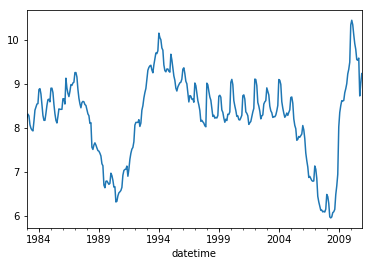

In [39]:
%matplotlib inline  
unemployment[unemployment.seasonality=='nsa'].groupby('datetime').unemployment_rate.mean().plot()

### Desafio 5 - Perguntas avançadas

Use of dataframe `unemployment` para responder às seguintes perguntas

- Qual o mês de maior taxa de desemprego médio na Áustria? (R: Janeiro). Dica: use o método `idmax` ao final
- Qual a maior variação mensal da taxa de desemprego ajustada sazonalmente da Suécia? (R: 1.1). Dica use o método `diff`

In [120]:
# use essa celula para chegar às respostas